In [ ]:
#packages
import pandas as pd


###Reading in Flu text files, making them csv files and re-labeling them

	- not related vs related
			- related removed because most related appear afterward in other 2 datasets

	- infection vs awareness
			- infection removed because infection its covered by self vs others after

	- self vs others
			- changed others label from 0 to 2 and self label from 1 to 3
  
Final labels:

- 0: not related
- 1: awareness
- 2: others
- 3: self


### Working with 2009 Flu Data

In [ ]:
RvNR2009 = pd.read_csv (r'/content/RelatedVsNotRelated2009TweetIDs.txt', delimiter = '	')
RvNR2009.columns = ['Tweet ID', 'Label']
RvNR2009['Disease'] = 'Influenza' 
onlyNR = RvNR2009.query("Label == 0")

In [ ]:
AvI2009 = pd.read_csv (r'/content/AwarenessVsInfection2009TweetIDs.txt', delimiter = '	')
AvI2009.columns = ['Tweet ID', 'Label']
AvI2009['Disease'] = 'Influenza' 
onlyA = AvI2009.query("Label == 1")

In [ ]:
SvO2009 = pd.read_csv (r'/content/SelfVsOthers2009TweetIDs.txt', delimiter = '	')
SvO2009.columns = ['Tweet ID', 'Label']

SvO2009['Disease'] = 'Influenza' 
for index, row in SvO2009.iterrows():
  if (row["Label"]) == 0:
    SvO2009.at[index, "Label"] = 2
  elif (row["Label"]) == 1:
    SvO2009.at[index, "Label"] = 3

In [ ]:
final2009 = pd.concat([onlyNR, onlyA, SvO2009], ignore_index=True)
final2009 = final2009.drop_duplicates(subset='Tweet ID', ignore_index=True, keep='first')
swap_list = ['Tweet ID', 'Disease', 'Label']
final2009 = final2009.reindex(columns=swap_list)

In [ ]:
final2009.to_csv (r'/content/final2009.csv', index=None)
final2009

,Tweet ID,Disease,Label
0,6003455112,Influenza,0
1,6002109706,Influenza,0
2,5990850113,Influenza,0
3,5990798305,Influenza,0
4,4636047505,Influenza,0
...,...,...,...
3216,5448552204,Influenza,2
3217,5270093101,Influenza,2
3218,4464123603,Influenza,2
3219,5619381608,Influenza,3


###Working with 2012 Flu Data

In [ ]:
RvNR2012 = pd.read_csv (r'/content/RelatedVsNotRelated2012TweetIDs.txt', delimiter = '	')
RvNR2012.columns = ['Tweet ID', 'Label']
RvNR2012['Disease'] = 'Influenza' 
onlyNR = RvNR2012.query("Label == 0")

In [ ]:
AvI2012 = pd.read_csv (r'/content/AwarenessVsInfection2012TweetIDs.txt', delimiter = '	')
AvI2012.columns = ['Tweet ID', 'Label']
AvI2012['Disease'] = 'Influenza' 
onlyA = AvI2012.query("Label == 1")

In [ ]:
SvO2012 = pd.read_csv (r'/content/SelfVsOthers2012TweetIDs.txt', delimiter = '	')
SvO2012.columns = ['Tweet ID', 'Label']

SvO2012['Disease'] = 'Influenza' 
for index, row in SvO2012.iterrows():
  if (row["Label"]) == 0:
    SvO2012.at[index, "Label"] = 2
  elif (row["Label"]) == 1:
    SvO2012.at[index, "Label"] = 3

In [ ]:
final2012 = pd.concat([onlyNR, onlyA, SvO2012], ignore_index=True)

final2012 = final2012.drop_duplicates(subset='Tweet ID', ignore_index=True, keep='first')

swap_list = ['Tweet ID', 'Disease', 'Label']
final2012 = final2012.reindex(columns=swap_list)


In [ ]:
final2012.to_csv (r'/content/final2012.csv', index=None)
final2012

,Tweet ID,Disease,Label
0,4063122008,Influenza,0
1,4063124211,Influenza,0
2,4063623202,Influenza,0
3,4063915008,Influenza,0
4,4624560710,Influenza,0
...,...,...,...
3429,4811366500,Influenza,3
3430,4811588313,Influenza,3
3431,4811935701,Influenza,2
3432,4812493714,Influenza,3


###Combining 2009 and 2012 Flu Data

In [ ]:
all_flu = pd.concat([final2009, final2012], ignore_index=True)
print(all_flu.shape)
all_flu = all_flu.drop_duplicates(subset='Tweet ID', ignore_index=True, keep='first')
print(all_flu.shape)

(6655, 3)
(6467, 3)


In [ ]:
all_flu.to_csv (r'/content/all_flu.csv', index=None)
all_flu

,Tweet ID,Disease,Label
0,6003455112,Influenza,0
1,6002109706,Influenza,0
2,5990850113,Influenza,0
3,5990798305,Influenza,0
4,4636047505,Influenza,0
...,...,...,...
6462,4811366500,Influenza,3
6463,4811588313,Influenza,3
6464,4811935701,Influenza,2
6465,4812493714,Influenza,3


###Working with phm2017 data: change to csv 

Labels:
* 0: non-health
* 1: awareness
* 2: other-mention
* 3: self-mention


In [ ]:
#phm2017 read in and change to csv

phm2017_read = pd.read_csv ('/content/PHM2017.txt', delimiter = '	')
phm2017_read.columns = ['Tweet ID', 'Disease', 'Label']
phm2017_read.to_csv (r'/content/PHM2017.csv', index=None)


In [ ]:
phm2017_read

,Tweet ID,Disease,Label
0,811746810733723649,alzheimer,1
1,902649153792098304,alzheimer,1
2,811695298359783424,alzheimer,0
3,811696543501864961,alzheimer,1
4,813212976257896449,alzheimer,1
...,...,...,...
7186,813207357689892864,stroke,3
7187,903019970292060169,stroke,0
7188,902668028055175168,stroke,1
7189,902669513962991616,stroke,0


- counts
(counts of disease, labelling within them, total label (without taking disease into mind)


In [ ]:
# all-flu data counts
print ("all_flu labels:")
print(all_flu['Label'].value_counts())

print ("phm2017 disease:")
print(phm2017_read['Disease'].value_counts())

print ("phm2017 labels:")
print(phm2017_read['Label'].value_counts())

print("phm2017 labels in diseases")
print("alzheimers labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'alzheimer']
print(temp['Label'].value_counts())


print("cancer labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'cancer']
print(temp['Label'].value_counts())

print("stroke labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'stroke']
print(temp['Label'].value_counts())

print("heart attack labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'heart attack']
print(temp['Label'].value_counts())

print("depression labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'depression']
print(temp['Label'].value_counts())

print("parkinson labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'parkinson']
print(temp['Label'].value_counts())

#graph it
# %'s + distribution of labels

all_flu labels:
0    2677
1    1974
3    1320
2     496
Name: Label, dtype: int64
phm2017 disease:
alzheimer       1255
cancer          1242
stroke          1222
heart attack    1219
depression      1213
parkinson       1040
Name: Disease, dtype: int64
phm2017 labels:
1    3601
0    2178
2     813
3     599
Name: Label, dtype: int64
phm2017 labels in diseases
alzheimers labels
1    1004
2     212
0      26
3      13
Name: Label, dtype: int64
cancer labels
1    771
2    221
0    211
3     39
Name: Label, dtype: int64
stroke labels
0    701
1    353
2    137
3     31
Name: Label, dtype: int64
heart attack labels
0    855
1    207
2    109
3     48
Name: Label, dtype: int64
depression labels
1    594
3    449
0    130
2     40
Name: Label, dtype: int64
parkinson labels
1    672
0    255
2     94
3     19
Name: Label, dtype: int64


all_flu labels:
   All Flu Labels  Count
0               0   2677
1               1   1974
3               2    496
2               3   1320
distribution:
[0.41394773465285295, 0.30524199783516315, 0.0766970774702335, 0.20411319004175044]


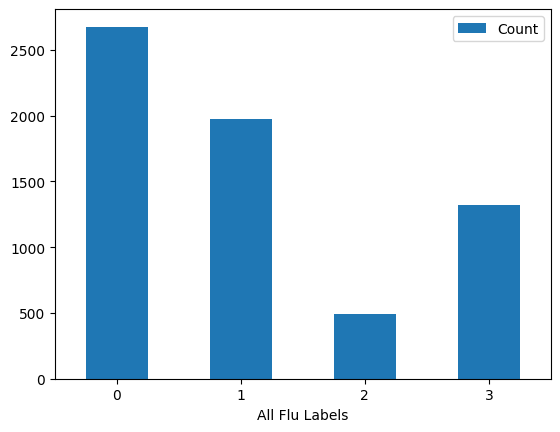

In [ ]:
print ("all_flu labels:")
flu_disease = ['0', '1', '2', '3']
df = all_flu['Label'].value_counts()
df = df.reset_index()
df.columns = ['All Flu Labels', 'Count']
df2 = df.sort_values('All Flu Labels')
print(df2)
flu_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'All Flu Labels': flu_disease, 'Count':flu_disease_count})
ax = df.plot.bar(x='All Flu Labels', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

phm2017 disease:
          index  Disease
0     alzheimer     1255
1        cancer     1242
2        stroke     1222
3  heart attack     1219
4    depression     1213
5     parkinson     1040
distribution:
[0.17452371019329718, 0.17271589486858574, 0.16993464052287582, 0.16951745237101934, 0.16868307606730634, 0.1446252259769156]


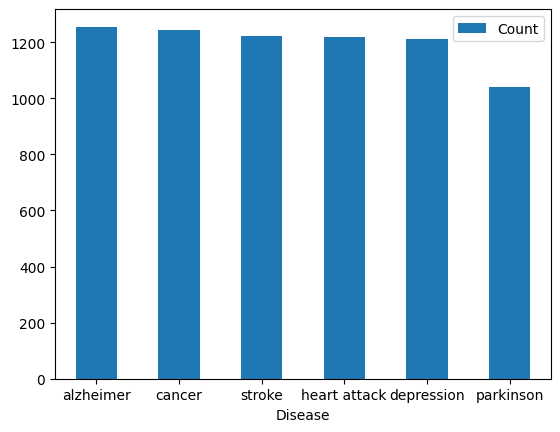

In [ ]:
print ("phm2017 disease:")
phm2017_disease = ['alzheimer', 'cancer', 'stroke', 'heart attack', 'depression', 'parkinson']
df = phm2017_read['Disease'].value_counts()
df = df.reset_index()
print(df)
df.columns = ['Disease', 'Count']
phm2017_disease_count = df.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Disease': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Disease', y='Count', rot=0)

print('distribution:')
total = df['Count'].sum() 
dist = []
for index, row in df.iterrows():
  dist.append(row['Count']/total)
print(dist)

phm2017 labels:
   PHM2017 Labels  Count
1               0   2178
0               1   3601
2               2    813
3               3    599
distribution:
[0.30287859824780977, 0.5007648449450702, 0.11305798915310805, 0.08329856765401196]


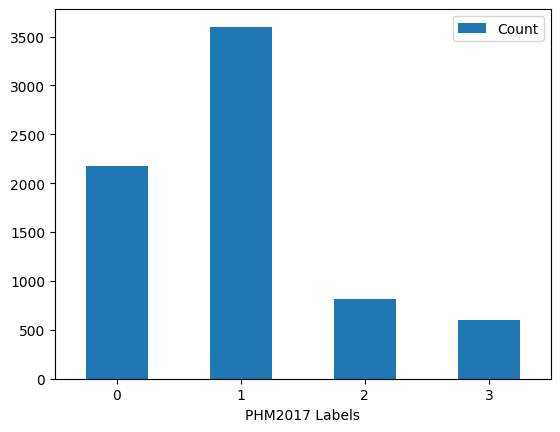

In [ ]:
print ("phm2017 labels:")
phm2017_disease = ['0', '1', '2', '3']
df = phm2017_read['Label'].value_counts()
df = df.reset_index()
df.columns = ['PHM2017 Labels', 'Count']
df2 = df.sort_values('PHM2017 Labels')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'PHM2017 Labels': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='PHM2017 Labels', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

phm2017 labels in diseases
alzheimers labels
   Alzheimer's Labels  Count
2                   0     26
0                   1   1004
1                   2    212
3                   3     13
distribution:
[0.020717131474103586, 0.8, 0.16892430278884463, 0.010358565737051793]


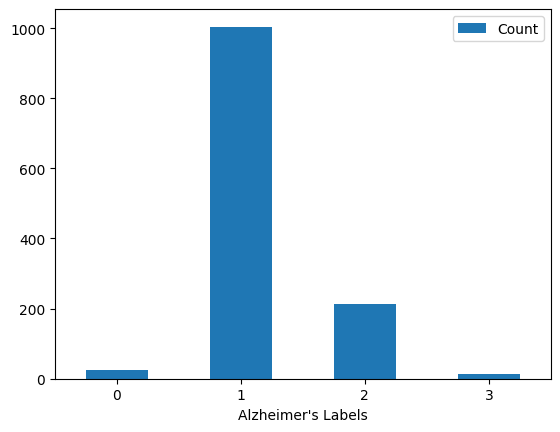

In [ ]:
print("phm2017 labels in diseases")
print("alzheimers labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'alzheimer']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Alzheimer\'s Labels', 'Count']
df2 = df.sort_values('Alzheimer\'s Labels')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Alzheimer\'s Labels': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Alzheimer\'s Labels', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

cancer labels
   Cancer Labels  Count
2              0    211
0              1    771
1              2    221
3              3     39
distribution:
[0.16988727858293076, 0.6207729468599034, 0.177938808373591, 0.03140096618357488]


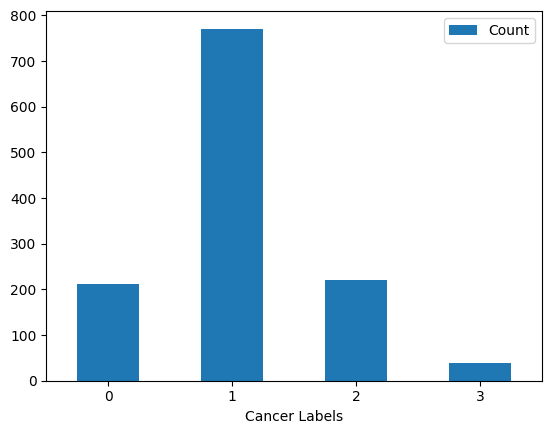

In [ ]:
print("cancer labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'cancer']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Cancer Labels', 'Count']
df2 = df.sort_values('Cancer Labels')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Cancer Labels': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Cancer Labels', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

stroke labels
   Stroke Labels  Count
0              0    701
1              1    353
2              2    137
3              3     31
distribution:
[0.5736497545008183, 0.2888707037643208, 0.11211129296235679, 0.02536824877250409]


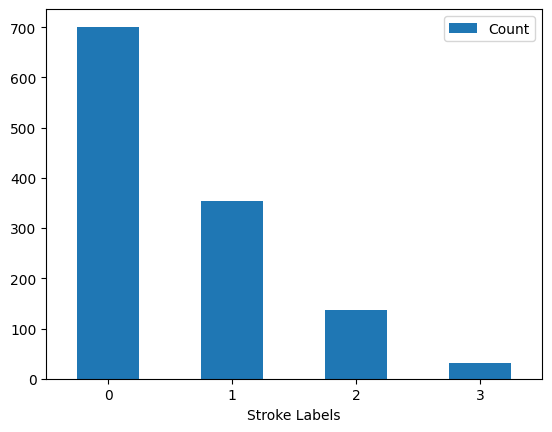

In [ ]:
print("stroke labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'stroke']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Stroke Labels', 'Count']
df2 = df.sort_values('Stroke Labels')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Stroke Labels': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Stroke Labels', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

heart attack labels
   Heart Attack Labels  Count
0                    0    855
1                    1    207
2                    2    109
3                    3     48
distribution:
[0.7013945857260049, 0.16981132075471697, 0.08941755537325677, 0.03937653814602133]


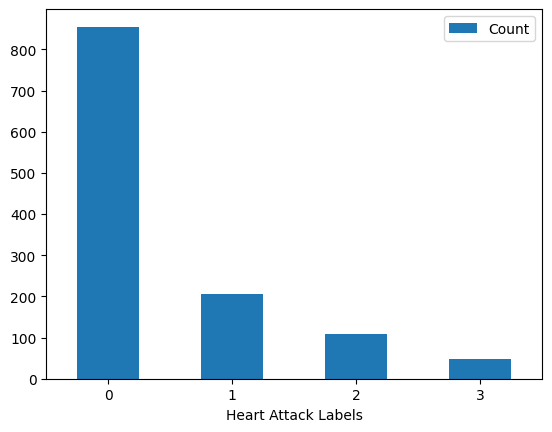

In [ ]:
print("heart attack labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'heart attack']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Heart Attack Labels', 'Count']
df2 = df.sort_values('Heart Attack Labels')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Heart Attack Labels': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Heart Attack Labels', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

depression labels
   Depression Labels  Count
2                  0    130
0                  1    594
3                  2     40
1                  3    449
distribution:
[0.10717230008244023, 0.4896949711459192, 0.03297609233305853, 0.37015663643858204]


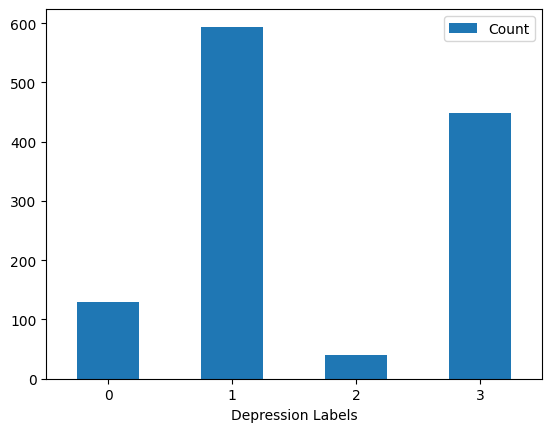

In [ ]:
print("depression labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'depression']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Depression Labels', 'Count']
df2 = df.sort_values('Depression Labels')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Depression Labels': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Depression Labels', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

parkinson labels
   Parkinson Labels  Count
1                 0    255
0                 1    672
2                 2     94
3                 3     19
distribution:
[0.24519230769230768, 0.6461538461538462, 0.09038461538461538, 0.01826923076923077]


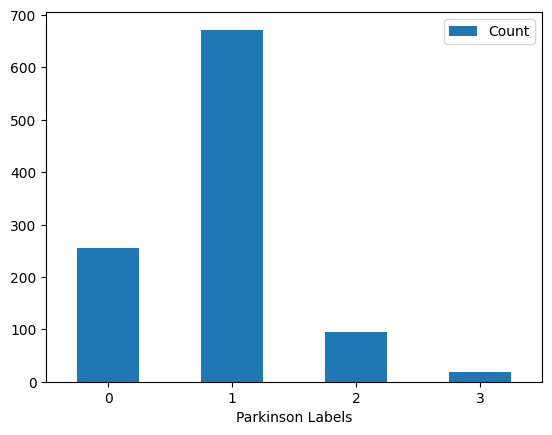

In [ ]:
print("parkinson labels")
temp = phm2017_read.loc[phm2017_read['Disease'] == 'parkinson']
#print(temp['Label'].value_counts())

phm2017_disease = ['0', '1', '2', '3']
df = temp['Label'].value_counts()
df = df.reset_index()
df.columns = ['Parkinson Labels', 'Count']
df2 = df.sort_values('Parkinson Labels')
print(df2)
phm2017_disease_count = df2.Count.values.tolist()
#print(phm2017_disease_count)


df = pd.DataFrame({'Parkinson Labels': phm2017_disease, 'Count':phm2017_disease_count})
ax = df.plot.bar(x='Parkinson Labels', y='Count', rot=0)

print('distribution:')
total = df2['Count'].sum() 
dist = []
for index, row in df2.iterrows():
  dist.append(row['Count']/total)
print(dist)

In [ ]:
flu = pd.read_csv("all_flu.csv")
phm = pd.read_csv("PHM2017.csv")
temp = [flu, phm]
all_labels = pd.concat(temp)
print(all_labels.shape)
all_labels = all_labels.drop_duplicates(subset='Tweet ID', ignore_index=True, keep='first')
print(all_labels.shape)
tweets_flu = pd.read_csv("all_flu_tweets.csv")
tweets_phm = pd.read_csv("phm2017_tweets.csv")
temp = [tweets_flu, tweets_phm]
all_tweets = pd.concat(temp)
print(all_tweets.shape)
all_tweets = all_tweets.drop_duplicates(subset='Tweet Id', ignore_index=True, keep='first')
print(all_tweets.shape)
tweets_flu.drop(columns=["Unnamed: 0"], inplace = True)
tweets_phm.drop(columns=["Unnamed: 0"], inplace = True)


(13658, 3)
(13658, 3)
(7938, 4)
(7603, 4)


In [ ]:
all_labels.rename(columns={"Tweet ID": "tweet_id"}, inplace = True)
all_labels

,tweet_id,Disease,Label
0,6003455112,Influenza,0
1,6002109706,Influenza,0
2,5990850113,Influenza,0
3,5990798305,Influenza,0
4,4636047505,Influenza,0
...,...,...,...
13653,813207357689892864,stroke,3
13654,903019970292060169,stroke,0
13655,902668028055175168,stroke,1
13656,902669513962991616,stroke,0


In [ ]:
all_tweets.rename(columns={"Tweet Id": "tweet_id"}, inplace = True)
all_tweets

,Unnamed: 0,tweet_id,Text,Username
0,0,6003319713,Getting a little fed up with having (Insert Ra...,zenemu
1,1,5991525204,Just getting over swine flu. It must have bee...,writerbrock
2,2,5989718714,this flu season is a horrible. everyone is get...,olow
3,3,5986621813,so glad @blakewsmith won't be getting the pig ...,leighwsmith
4,4,5986140306,@saracrow Luck luck. I got mine Friday. My ar...,BoyceDan
...,...,...,...,...
7598,4411,905528009188413441,"Eyes on her feet, lips on her toes. Now keep q...",Kinky_Girlie
7599,4412,905524344016830465,When I watch Trump's vids w/o sound...I feel l...,Cori_Jo
7600,4413,902665550148509696,Bruh i almost had a heat stroke coming to work,Lillyy_Vee
7601,4414,902669513962991616,after i stroke her leave her pussy soakin😋,J2Almighty


In [ ]:
all_tweets.convert_dtypes().dtypes 
all_labels.convert_dtypes().dtypes

tweet_id     Int64
Disease     string
Label        Int64
dtype: object

In [ ]:
try:
    all_tweets['tweet_id'] = pd.to_numeric(all_tweets['tweet_id']) 
except ValueError:
    # I want to register on my log the message recived on ORIGINAL VALUE
    mask = pd.to_numeric(all_tweets['tweet_id'].fillna('0'), errors='coerce').isna() 
    L = all_tweets.loc[mask, 'tweet_id'].tolist()
    for val in L:
        print (f"Not converted values are: {val}")
        #log.exception(f"Not converted values are: {val}")

Not converted values are: those2girls
Not converted values are: dldavispmp
Not converted values are: injooniie
Not converted values are: MCProductions_1


In [ ]:
# consider the list
list1 = ['those2girls', 'dldavispmp', 'injooniie','MCProductions_1']
 
# drop rows from above list
all_tweets =  all_tweets[all_tweets.tweet_id.isin(list1) == False]

all_tweets = all_tweets[all_tweets.tweet_id.isin([0]) == False]

In [ ]:
all_tweets['tweet_id'] = pd.to_numeric(all_tweets['tweet_id'])
all_labels

,tweet_id,Disease,Label
0,6003455112,Influenza,0
1,6002109706,Influenza,0
2,5990850113,Influenza,0
3,5990798305,Influenza,0
4,4636047505,Influenza,0
...,...,...,...
13653,813207357689892864,stroke,3
13654,903019970292060169,stroke,0
13655,902668028055175168,stroke,1
13656,902669513962991616,stroke,0


In [ ]:
all_data = pd.merge(all_labels, all_tweets, on="tweet_id")
all_data.drop(columns=["Unnamed: 0"], inplace = True)
all_data

,tweet_id,Disease,Label,Text,Username
0,4636047505,Influenza,0,Canadian studies says people getting the seaso...,whitenhiemer
1,3870336510,Influenza,0,"Air Kisses, Hugs, and Other Ways to Avoid Gett...",tomheston
2,4033778103,Influenza,0,#swineflu Saudis dismiss Hajj swine flu fears ...,swineflu2
3,4427192511,Influenza,0,is lil worried. 07 Chinese year of the Chicken...,CheryflavourPie
4,4607707014,Influenza,0,Also could this virus have been related to the...,TUTTALLEN009
...,...,...,...,...,...
5220,813159580792406016,stroke,0,"@NoceurTitanium\n""Depends on the lighting."" Sh...",JokerWithABow
5221,902691300817879040,stroke,1,Methamphetamines tied to higher stroke risk am...,KimEnsorRN
5222,813224844414349312,stroke,1,Meanwhile in the south we stay indoors to avoi...,jakemck1993
5223,902665550148509696,stroke,1,Bruh i almost had a heat stroke coming to work,Lillyy_Vee


In [ ]:
all_data.to_csv("all_data.csv", index = False)

In [ ]:
model_input = all_data.drop(['Disease', 'Username'], axis=1)
model_input

,tweet_id,Label,Text
0,4636047505,0,Canadian studies says people getting the seaso...
1,3870336510,0,"Air Kisses, Hugs, and Other Ways to Avoid Gett..."
2,4033778103,0,#swineflu Saudis dismiss Hajj swine flu fears ...
3,4427192511,0,is lil worried. 07 Chinese year of the Chicken...
4,4607707014,0,Also could this virus have been related to the...
...,...,...,...
5220,813159580792406016,0,"@NoceurTitanium\n""Depends on the lighting."" Sh..."
5221,902691300817879040,1,Methamphetamines tied to higher stroke risk am...
5222,813224844414349312,1,Meanwhile in the south we stay indoors to avoi...
5223,902665550148509696,1,Bruh i almost had a heat stroke coming to work


In [ ]:
model_input.to_csv("model_input.csv", index = False)